In [27]:
import torch


In [28]:
# 数据集
x_data = torch.Tensor([[1.0],[2.0],[3.0]])
y_data = torch.Tensor([[2.0],[4.0],[6.0]])

In [ ]:
# 模型
# 模型应当打包成类
class Linear_model(torch.nn.Module):
    # _init_()和forward()必须被实现
    def __init__(self):
        # 调用父类的初始化
        super(Linear_model,self).__init__()
        # 初始化模型，(1,1):(input,output)即输入维度为1，输出维度为1
        self.linear = torch.nn.Linear(1,1) 

    def forward(self,x):
        y_pred = self.linear(x)
        return y_pred

model = Linear_model()    

In [42]:
# 损失函数和优化器
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

In [ ]:
# 训练模型 forward -> backward -> update
loss_list =[]
for epoch in range(100):
    y_pred = model.linear(x_data)
    loss = criterion(y_pred,y_data)
    # 此处loss对象会自动调用_str_并不会产生计算图
    print(epoch,loss.item())  
    loss_list.append(loss.item())

    
    optimizer.zero_grad()
    loss.backward()
    # update
    optimizer.step()

0 45.189701080322266
1 35.72689437866211
2 28.24701690673828
3 22.334543228149414
4 17.6610107421875
5 13.966804504394531
6 11.046698570251465
7 8.738479614257812
8 6.913923263549805
9 5.471677303314209
10 4.331627368927002
11 3.430447816848755
12 2.718081474304199
13 2.154963254928589
14 1.7098177671432495
15 1.3579216003417969
16 1.0797370672225952
17 0.8598162531852722
18 0.6859493851661682
19 0.54848712682724
20 0.43980076909065247
21 0.3538597822189331
22 0.2858980894088745
23 0.23214833438396454
24 0.18963225185871124
25 0.15599627792835236
26 0.12937942147254944
27 0.10831121355295181
28 0.09162861853837967
29 0.07841341197490692
30 0.06793863326311111
31 0.05963024124503136
32 0.05303434655070305
33 0.04779237508773804
34 0.04362070932984352
35 0.04029509425163269
36 0.03763849660754204
37 0.0355108417570591
38 0.03380142152309418
39 0.03242258355021477
40 0.03130533546209335
41 0.030394956469535828
42 0.029648229479789734
43 0.029030995443463326
44 0.028516164049506187
45 0.02

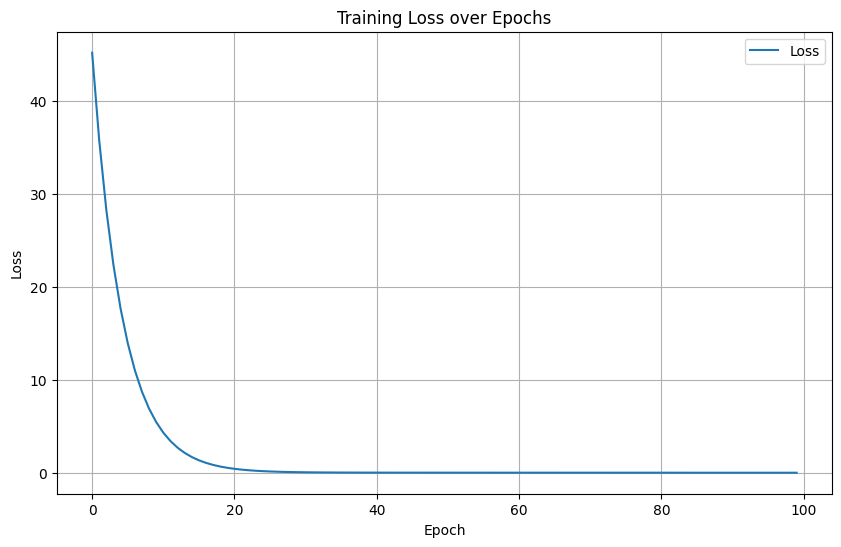

In [44]:
import matplotlib.pyplot as plt

# 假设 loss_list 是在训练过程中记录的损失值列表

# 绘制损失变化图
plt.figure(figsize=(10, 6))
plt.plot(range(len(loss_list)), loss_list, label="Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss over Epochs")
plt.legend()
plt.grid()
plt.show()


In [20]:

# item()获取标量防止生成计算图
print('w = ',model.linear.weight.item())
print('b = ',model.linear.bias.item())

# 测试模型
x_test = torch.Tensor([[4.0]])
y_test = model(x_test)

# data获取tensor防止生成计算图
print('y_pred = ',y_test.data)


w =  2.0000085830688477
b =  -1.722570596029982e-05
y_pred =  tensor([[8.0000]])
